# Project 2
#### Ashish Yonzon, Brenden Latham, Oluwatobi Afolabi
#### CPSMA-4413 Numerical Analysis
#### Dr. Jacob

In [ ]:
#Estimating the derivatives
# Ref: https://www.lehigh.edu/~ineng2/clipper/notes/NumDif.htm


In [ ]:
import math
import pandas as pd
import numpy as np

In this project we will explore the calculation of derivatives up to the second order as well as Lagrange Interpolations. First we will have a look at derivatives. Previously we examined Taylor Series using the exponential function. We could use that here, however we have agreed it would not be as interesting when exploring derivative calculations, as the nth derivative of the function is equal to the function itself. Instead, we will use a 4th degree polynomial, and later come back to the exponential function when taking a look at Lagrange Interpolation. We beleive this will yield the most interesting results and help us better understand both topics.

First we build a function for computing the first derivative by forward, backward, and center difference as described by the formulas below that have been derived from the taylor series.

### $f'(x) = \frac{f(x+h)-f(x)}{h} \\  f'(x) = \frac{f(x)-f(x-h)}{h} \\ f'(x) = \frac{f(x+h)-f(x-h)}{2h} $


In [ ]:
def derivative(f,x,h):
  forward = (f(x+h) - f(x))/h
  backward = (f(x) - f(x-h))/h
  center = (f(x+h) - f(x-h)) /(2*h)
  return forward, backward, center
 

Next we will build a function for computing the second derivative. This function is also derived from the taylor series.

### $ f''(x) = \frac{f(x+h)-2f(x)+f(x-h)}{h^2} $

In [ ]:
def double_derivative(f,x,h):
  finite = (f(x+h) - (2*f(x)) + f(x-h)) / h**2
  return finite

We now compare our functions with the actual value, and determine the error.

In [ ]:
# our chosen polynomial
def f(x):
  return (2*(x**4))+(2*(x**3))

In [ ]:
# real derivative
def f_prime(x):
  return (8*(x**3))+(6*(x**2))

In [ ]:
# real second derivative
def f_double_prime(x):
  return (24*(x**2))+(12*x)

In [ ]:
# absolute error
def abs_error(true_value,predicted_value):
  abs_error = abs(true_value - predicted_value)
  return abs_error 

In [ ]:
# relative error
def rel_error(true_value,predicted_value):
  rel_error = abs_error(true_value,predicted_value)/true_value
  return rel_error 

In [ ]:

h_values = np.array([1e-1, 1e-2, 1e-3, 1e-4, 1e-5])
x=2
# Compute the first derivative approximation for each step size
forward_first_derivative = derivative(f,x,h_values)[0]
backward_first_derivative = derivative(f,x,h_values)[1]
central_first_derivative = derivative(f,x,h_values)[2]
# Compute the actual value of the first derivative
actual_value = f_prime(x)
# Compute the absolute of the first derivative
abs_error_1 = abs_error(actual_value,forward_first_derivative)
abs_error_2 = abs_error(actual_value,backward_first_derivative)
abs_error_3 = abs_error(actual_value,central_first_derivative)
# Compute the relative value of the first derivative
rel_error_1 = 100*rel_error(actual_value,forward_first_derivative)
rel_error_2 = 100*rel_error(actual_value,backward_first_derivative)
rel_error_3 = 100*rel_error(actual_value,central_first_derivative)
# Create a pandas dataframe to store the results
data = {
    'Step size (h)': h_values,
    'Forward difference': forward_first_derivative,
    'Backward difference': backward_first_derivative,
    'Central difference': central_first_derivative,
    'Actual value': actual_value,
    'Absolute error (forward)': abs_error_1,
    'Absolute error (backward)': abs_error_2,
    'Absolute error (central)': abs_error_3,
    'Relative error (forward)': rel_error_1,
    'Relative error (backward)':rel_error_2,
    'Relative error (central)': rel_error_3,
}
df = pd.DataFrame(data)

# Set the index to the step size column
df = df.set_index('Step size (h)')
print("First Order Derivative of 2x^4+2x^3")
df

First Order Derivative of 2x^4+2x^3


,Forward difference,Backward difference,Central difference,Actual value,Absolute error (forward),Absolute error (backward),Absolute error (central),Relative error (forward),Relative error (backward),Relative error (central)
Step size (h),,,,,,,,,,
0.10000,94.182000,82.178000,88.180000,88,6.182000,5.822000,1.800000e-01,7.025000,6.615909,2.045455e-01
0.01000,88.601802,87.401798,88.001800,88,0.601802,0.598202,1.800000e-03,0.683866,0.679775,2.045455e-03
0.00100,88.060018,87.940018,88.000018,88,0.060018,0.059982,1.799999e-05,0.068202,0.068161,2.045453e-05
0.00010,88.006000,87.994000,88.000000,88,0.006000,0.006000,1.800951e-07,0.006818,0.006818,2.046536e-07
0.00001,88.000600,87.999400,88.000000,88,0.000600,0.000600,2.352849e-09,0.000682,0.000682,2.673692e-09


Here we have our results. We can see that the central difference approaches the real value faster than the forward and backward difference as the step size gets smaller. By the time we get to the smallest step size, we end up with a very small error. Even with our second largest step size we see a relative error of less than one percent with all methods.

We will now explore Lagrange Interpolation with the exponential function. We will first look at the interpolation with three points relative to the center we used in the previous project. We centered out Taylor Seried at 1, so our points will be as seen below in the table.

| x   | f(x)  |
|-----|-------|
| 1   | e^1   |
| 1.1 | e^1.1 |
| 2   | e^2   |

In [ ]:
def g(t):
  return np.exp(t)
def euler_lagrange(t):
  k_0=(g(1)-((1/99)*((-1000*g(1.1))+1100)) -g(2)+1+((3/99)*((-1000*g(1.1))+1100)))
  k_1=g(2)-1-((3/99)*((-1000*g(1.1))+1100))
  k_2=(1/99)*((-1000*g(1.1))+1100)
  return k_0+((k_1)*(t))+((k_2)*(t**2))

In [ ]:
abs_error_lagrange = np.exp(1.2)-euler_lagrange(1.2)
rel_error_lagrange = 100*abs_error_lagrange/np.exp(1.2)

print(" Lagrange Calculation:",euler_lagrange(1.2),"\n","Real Value:",np.exp(1.2),"\n","Absolute Error:",abs_error_lagrange,"\n","Relative Error:",rel_error_lagrange)

 Lagrange Calculation: 7.073533086946469 
 Real Value: 3.3201169227365472 
 Absolute Error: -3.7534161642099217 
 Relative Error: -113.0507223557728


Because there are only three coefficients to find, we calculated them by hand. This lagrange interpolation between 1 and 2 with one three points yields very inacurate results for values not between 1 and 1.1. Let's see what the derivatives look like compared.

In [ ]:
def euler_lagrange_derivative(t):
  k_1=g(2)-1-((3/99)*((-1000*g(1.1))+1100))
  k_2=(1/99)*((-1000*g(1.1))+1100)
  return (k_1)+(2*k_2*t)

In [ ]:
abs_error_lagrange_div = np.exp(1.2)-euler_lagrange_derivative(1.2)
rel_error_lagrange_div = 100*abs_error_lagrange_div/np.exp(1.2)

print(" Lagrange Calculation Derivative:",euler_lagrange_derivative(1.2),"\n","Real Value:",np.exp(1.2),"\n","Absolute Error:",abs_error_lagrange_div,"\n","Relative Error:",rel_error_lagrange_div)

 Lagrange Calculation Derivative: 17.929456244060546 
 Real Value: 3.3201169227365472 
 Absolute Error: -14.609339321323999 
 Relative Error: -440.02484434441277


As expected the derivatives are not very accurate either. We will now look at our interpolation and the actual function graphed together.

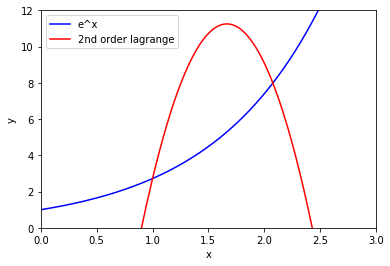

In [ ]:
import matplotlib.pyplot as plt

x = np.linspace(0, 3, 1000)
y = g(x)
y_lagrange = euler_lagrange(x)

plt.plot(x, y, label='e^x',color='blue')
plt.plot(x, y_lagrange, label='2nd order lagrange',color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,3])
plt.ylim([0,12])
plt.show()

We really do not have a good fit. I think we need to see what happens when we add more points. Let's fit between .5 and 2.5 with 5 evenly spread points. This will give us a 4th degree Lagrange Interpolation. I will use a numpy function to find the coefficients. This function utilizes methods from linear algebra that would normaly not work for the exponential function. However we can use extremely close approximations for the values of the exponential and still get a good fit.

In [ ]:
t_vals = np.array([[1,.5,.25,.125,.0625],[1,1,1,1,1],[1,1.5,1.25,1.875,2.8125],[1,2,4,8,16],[1,2.5,2.0625,11.390625,28.4765625]])
d_vals = np.array([np.exp(.5),np.exp(1),np.exp(1.5),np.exp(2),np.exp(2.5)])
coefficients = np.linalg.inv(t_vals).dot(d_vals)

In [ ]:
def euler_lagrange_4(t):
  value = 0
  exp = 0
  for c in coefficients:
    value = value+(c*(t**exp))
    exp = exp+1
  return value

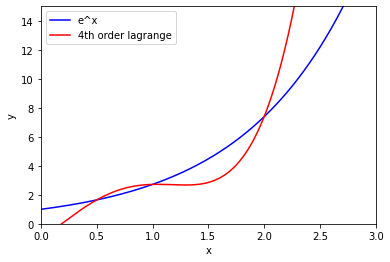

In [ ]:
x = np.linspace(0, 3, 1000)
y=g(x)
y_lagrange = euler_lagrange_4(x)

plt.plot(x, y, label='e^x',color='blue')
plt.plot(x, y_lagrange, label='4th order lagrange',color='red')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim([0,3])
plt.ylim([0,15])
plt.show()

This is starting to look more accurate. Here is a function to show how the Lagrange Interpolation approaches the actual function on a fixed interval as the step count increases.

In [ ]:
def coefficients_n(start,stop,count):
  t_vals = []
  d_vals = []
  for i in np.linspace(start,stop,count):
    temp = []
    power = 0
    for j in np.linspace(start,stop,count):
      temp.append(math.pow(i,power))
      power = power+1
    t_vals.append(temp)
    d_vals.append(np.exp(i))
  return(np.linalg.inv(t_vals).dot(d_vals))

def nth_lagrange(coefficients,t):
  value = 0
  exp = 0
  for c in coefficients:
    value = value+(c*(t**exp))
    exp = exp+1
  return value

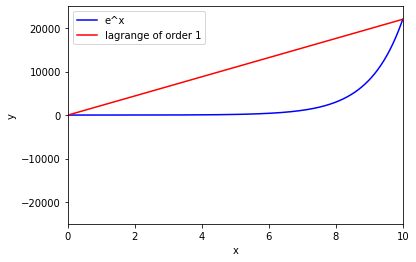

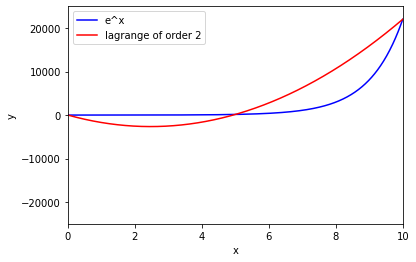

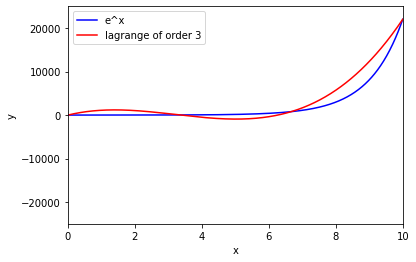

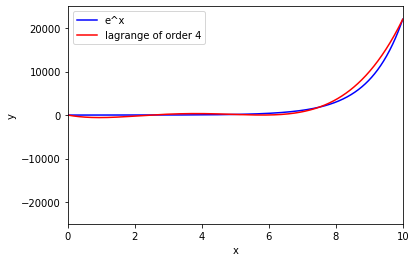

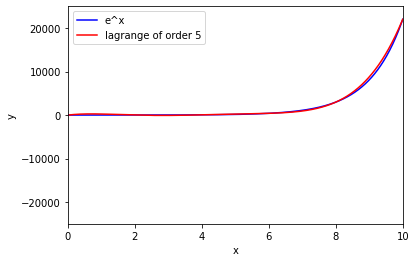

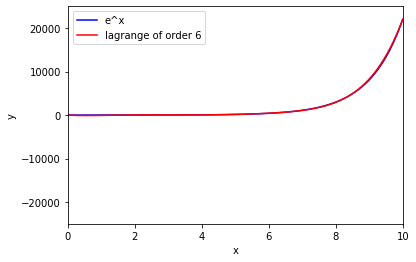

In [ ]:
for i in range(2,8,1) :
  x = np.linspace(0, 10, 1000)
  y=g(x)
  y_taylor = nth_lagrange(coefficients_n(0,10,i),x)
  Label = "lagrange of order "+str(i-1)

  plt.plot(x, y, label='e^x',color='blue')
  plt.plot(x, y_taylor, label=Label,color='red')
  plt.legend()
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xlim([0,10])
  plt.ylim([-25000,25000])
  plt.show()

It looks like the order of the lagrange interpolation determines the number of points for which the polynomial intersects the real function. Meaning the number of points of intersection will always be at least equal to the number of coefficients in the polynomial.